Installing All Requirements

In [ ]:
!pip install pandas
!pip install numpy 
!pip install -U scikit-learn
!pip install seaborn
!pip install lazypredict

Importing all the Libararies

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import lazypredict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier


Reading the CSV file and saving it as a dataframe

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

Using the shape method to understand the dataset

In [ ]:
df.shape

(768, 9)

Dropping the Outcome Column from the dataframe

In [ ]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

Created the Training and Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

print('X_train -', X_train.size)
print('X_test -', X_test.size)
print('y_train -', y_train.size)
print('y_test -', y_test.size)

Data Visualisation

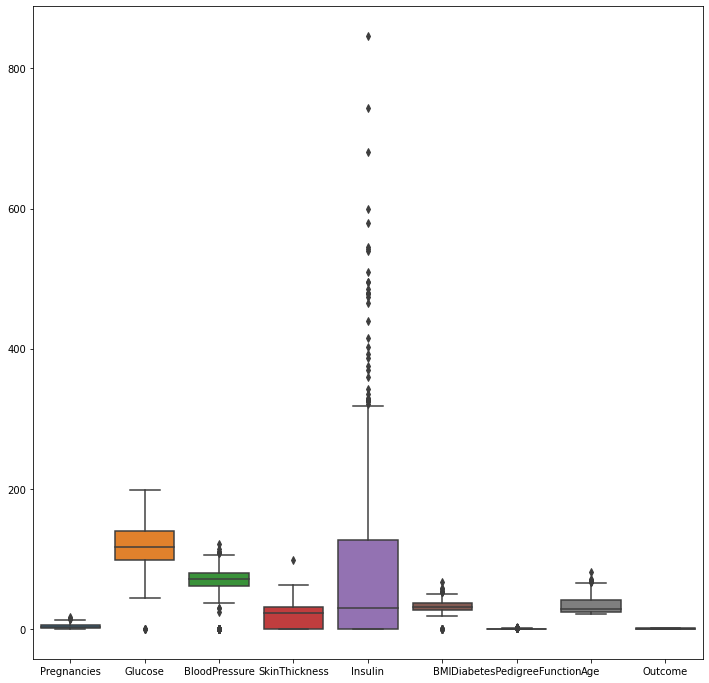

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(data=df)

#Removing outliers by setting their value to the median of the attribute

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

# Defining the machine learning models that we are comparing 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

dt = DecisionTreeClassifier()
SVM = svm.SVC()
knn = KNeighborsClassifier(n_neighbors=15)
lr = LogisticRegression()
nb = GaussianNB()
rf = RandomForestClassifier()
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

# Decision Tree Classifier

Testing Accuracy :  0.6883116883116883
Testing Precision :  0.8082191780821918


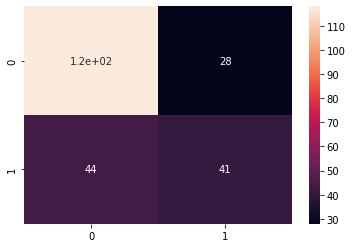

In [ ]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

dt_model = dt.fit(X_train,y_train)
dt_prediction = dt_model.predict(X_test)

cm_dt = confusion_matrix(y_test,dt_prediction)

sns.heatmap(cm_dt, annot=True, cmap = 'rocket' )
TP = cm_dt[0][0]
TN = cm_dt[1][1]
FN = cm_dt[1][0]
FP = cm_dt[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))

# Logistic Regression

Testing Accuracy :  0.7835497835497836
Testing Precision :  0.9041095890410958


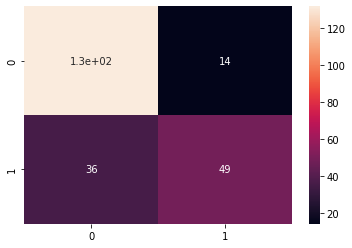

In [ ]:
lr_model = lr.fit(X_train,y_train)
lr_prediction = lr_model.predict(X_test)

cm_lr = confusion_matrix(y_test,lr_prediction)

sns.heatmap(cm_lr, annot=True, cmap = 'rocket' )
TP = cm_lr[0][0]
TN = cm_lr[1][1]
FN = cm_lr[1][0]
FP = cm_lr[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))

# Support Vector Machine

Testing Accuracy :  0.7705627705627706
Testing Precision :  0.9452054794520548


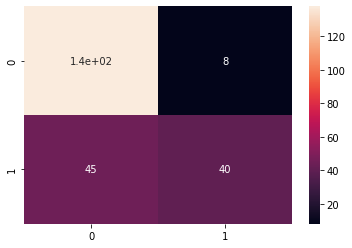

In [ ]:
svm_model = SVM.fit(X_train,y_train)
svm_prediction = svm_model.predict(X_test)

cm_svm = confusion_matrix(y_test,svm_prediction)

sns.heatmap(cm_svm, annot=True, cmap = 'rocket' )
TP = cm_svm[0][0]
TN = cm_svm[1][1]
FN = cm_svm[1][0]
FP = cm_svm[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))



# k-Nearest Neighbor Algorithm

Testing Accuracy :  0.7878787878787878
Testing Precision :  0.9315068493150684


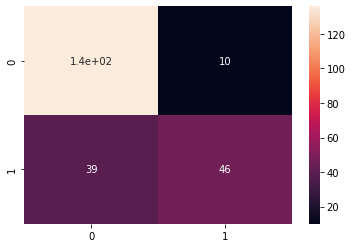

In [ ]:
knn_model = knn.fit(X_train,y_train)
knn_prediction = knn_model.predict(X_test)

cm_knn = confusion_matrix(y_test,knn_prediction)

sns.heatmap(cm_knn, annot=True, cmap = 'rocket' )
TP = cm_knn[0][0]
TN = cm_knn[1][1]
FN = cm_knn[1][0]
FP = cm_knn[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))




# Gaussian Naive Bayes Algorithm


Testing Accuracy :  0.7835497835497836
Testing Precision :  0.8767123287671232


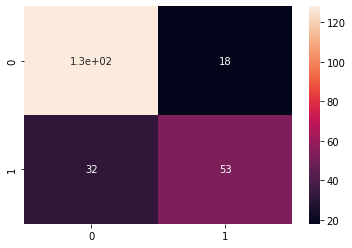

In [ ]:
nb_model = nb.fit(X_train,y_train)
nb_prediction = nb_model.predict(X_test)

cm_nb = confusion_matrix(y_test,nb_prediction)

sns.heatmap(cm_nb, annot=True, cmap = 'rocket' )
TP = cm_nb[0][0]
TN = cm_nb[1][1]
FN = cm_nb[1][0]
FP = cm_nb[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))

# Random Forest Classifier

Testing Accuracy :  0.7835497835497836
Testing Precision :  0.8835616438356164


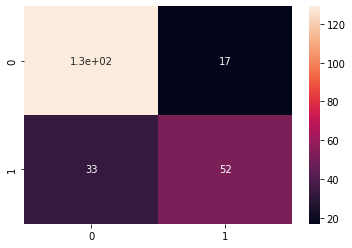

In [ ]:
rf_model = rf.fit(X_train,y_train)
rf_prediction = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test,rf_prediction)

sns.heatmap(cm_rf, annot=True, cmap = 'rocket' )
TP = cm_rf[0][0]
TN = cm_rf[1][1]
FN = cm_rf[1][0]
FP = cm_rf[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))


# Neural Network

Testing Accuracy :  0.6060606060606061
Testing Precision :  0.952054794520548


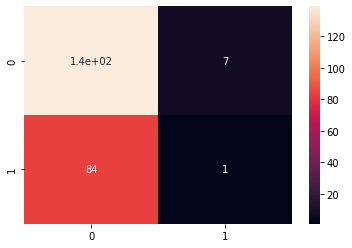

In [ ]:
nn_model = nn.fit(X_train,y_train)
nn_prediction = nn_model.predict(X_test)

cm_nn = confusion_matrix(y_test,nn_prediction)

sns.heatmap(cm_nn, annot=True, cmap = 'rocket' )
TP = cm_nn[0][0]
TN = cm_nn[1][1]
FN = cm_nn[1][0]
FP = cm_nn[0][1]

print('Testing Accuracy : ',(TP + TN) / (TP + TN + FP + FN))
print('Testing Precision : ', TP/(TP+FP))

# Semi-Automation of Unit Testing using LazyPredict Library

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print("/n")
print(models)

100%|██████████| 29/29 [00:01<00:00, 19.89it/s]

/n
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.81               0.78     0.78      0.81   
NearestCentroid                    0.78               0.78     0.78      0.78   
KNeighborsClassifier               0.79               0.76     0.76      0.79   
BaggingClassifier                  0.80               0.76     0.76      0.79   
ExtraTreesClassifier               0.78               0.75     0.75      0.78   
GaussianNB                         0.78               0.75     0.75      0.78   
SVC                                0.79               0.75     0.75      0.78   
BernoulliNB                        0.76               0.75     0.75      0.76   
AdaBoostClassifier                 0.78               0.74     0.74      0.78   
LinearDiscriminantAnalysis         0.78               0.74     0.74      0.78   
NuSVC                    

# Result Visualisation

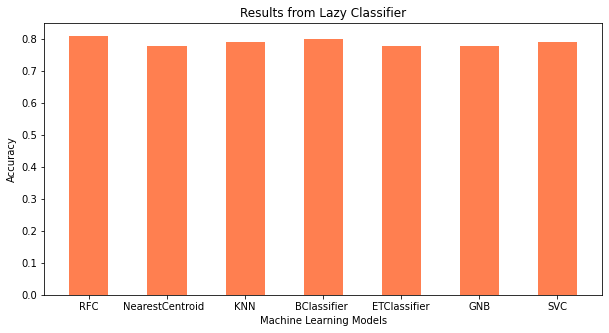

In [ ]:
import matplotlib.pyplot as plt

data = {'RFC':0.81 , 'NearestCentroid  ': 0.78, 'KNN':0.79 ,
        'BClassifier ':0.80,'ETClassifier':  0.78 ,'GNB':0.78,'SVC' : 0.79   }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='coral',
        width = 0.5)
 
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Results from Lazy Classifier")
plt.show()


Pickling the Model

In [ ]:
import pickle

# save the model
pickle.dump(rf_model, open('model_rfc.pkl', 'wb'))